# Task

1- Apply ML Regression techniques to make a model to predict (Yearly Amount Spent) from "Ecommerce Customers.csv".

# Import libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os as os
import joblib


In [36]:
from pandas_profiling import ProfileReport
from sklearn.impute import SimpleImputer  
from sklearn.impute import KNNImputer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  

In [37]:
# Regression 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Regression Models & Score structures
regression_models = {
    "LinearRegression": LinearRegression(),
    "KNeighborsRegressor" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor()
}

regscoresdf = pd.DataFrame(index=regression_models.keys(), 
                    columns=['Test R2', 'Train R2', 'Test RMSE', 'Train RMSE'])

In [38]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

In [39]:
class style():
    BLACK = '\033[30m'
    RED = '\033[31m'
    GREEN = '\033[32m'
    YELLOW = '\033[33m'
    BLUE = '\033[34m'
    MAGENTA = '\033[35m'
    CYAN = '\033[36m'
    WHITE = '\033[37m'
    UNDERLINE = '\033[4m'
    RESET = '\033[0m'

# Load Data

In [40]:
# load data set for regression 
df =pd.read_csv('Ecommerce Customers.csv')

# Explore Data

In [41]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [43]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [44]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# Virtualize Data

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [13]:
#from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")

In [14]:
profile

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Correlation heat map

<AxesSubplot:>

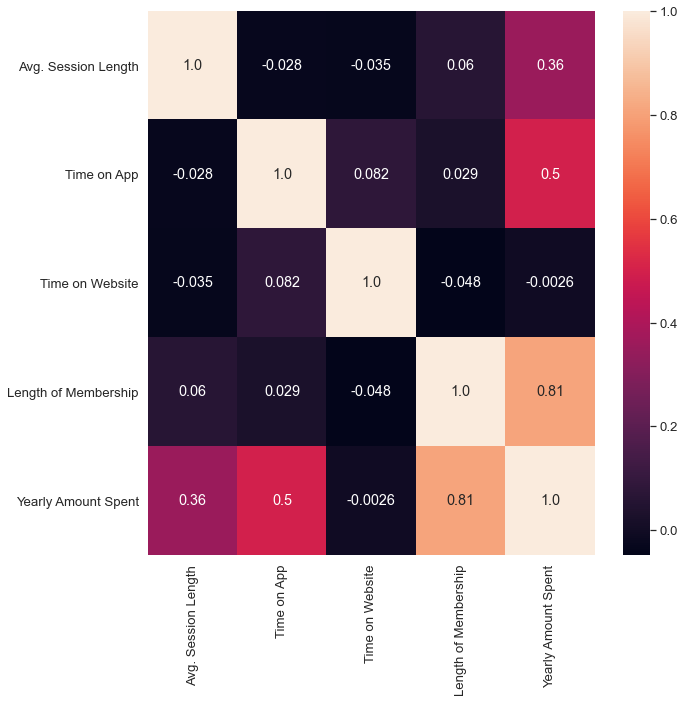

In [15]:
sns.heatmap(df.corr(),fmt=".2", annot=True)

Numeric  visualization

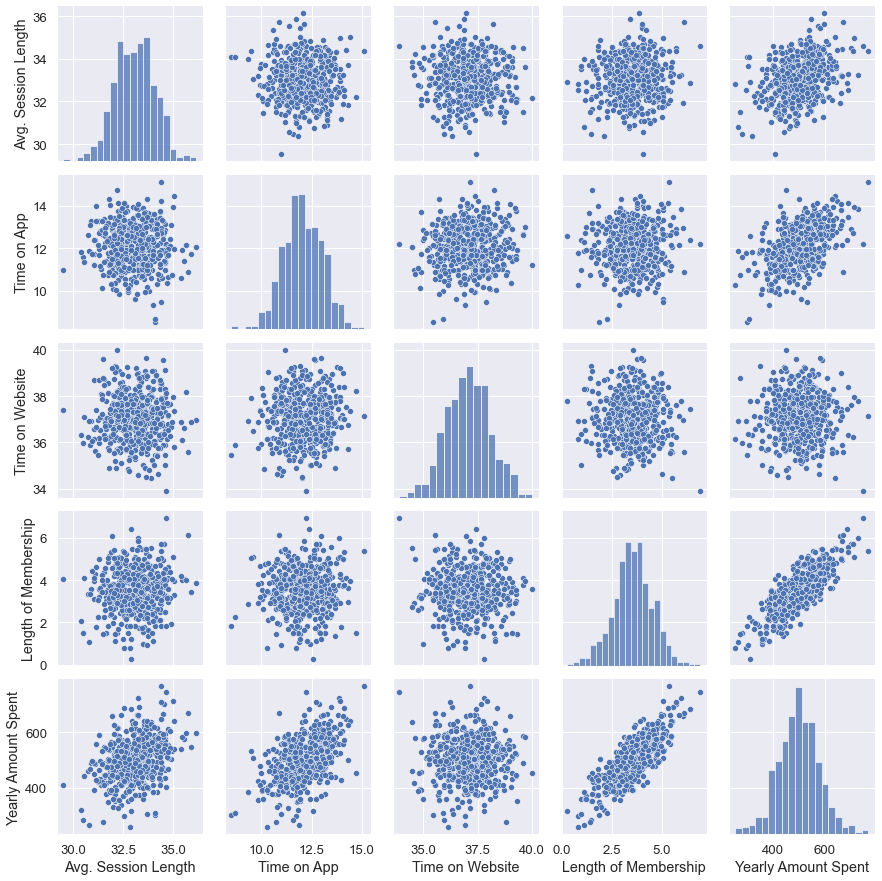

In [16]:
sns.pairplot(df)

Categorical visualization

# Train & Test Split

Copy df (orginal) or dfdp (after data processing) to dfml (that will be used for machine learning
same applied for columns_dic

split data to xtrain, ytrain, xtest, and ytest usingn sklearn

In [46]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [47]:
#Drop unwanted columns
df.drop(columns=[ 'Email', 'Address', 'Avatar'], inplace=True)

In [48]:
#Create x & y sets
x=df.drop(columns=['Yearly Amount Spent'])
y=df['Yearly Amount Spent']
#y=df['Yearly Amount Spent']

In [49]:
#Check columns
print(f'{style.BLUE}DataFrame Colmums: {style.BLACK}', end='')
print(df.columns)
print(f'{style.BLUE}x Colmums: {style.BLACK}', end='')
print(x.columns)
print(f'{style.BLUE}y Colmums: {style.BLACK}', end='')
print('Yearly Amount Spent')

DataFrame Colmums: Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')
x Colmums: Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')
y Colmums: Yearly Amount Spent


In [50]:
#check shape
print(f'{style.BLUE}DataFrame Shape:  {style.BLACK}', end='')
print(df.shape)
print(f'{style.BLUE}x Shape: {style.BLACK}', end='')
print(x.shape)
print(f'{style.BLUE}y Shape: {style.BLACK}', end='')
print(y.shape)

DataFrame Shape:  (500, 5)
x Shape: (500, 4)
y Shape: (500,)


In [51]:
#from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2 )

In [52]:
#check shape
print(f'{style.BLUE}x_train shape: {style.BLACK}{x_train.shape}, ', end='')
print(f'{style.BLUE}y_train shape: {style.BLACK}{y_train.shape}')
print(f'{style.BLUE}x_test shape: {style.BLACK}{x_test.shape}, ', end='')
print(f'{style.BLUE}y_test shape: {style.BLACK}{y_test.shape}')

x_train shape: (400, 4), y_train shape: (400,)
x_test shape: (100, 4), y_test shape: (100,)


# Feature scaling

In [53]:
#from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

# Regression Model

In [54]:
# Compare all models
for name, model in regression_models.items():
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    regscoresdf.loc[name, 'Train R2'] = r2_score(y_train,  y_train_pred)
    regscoresdf.loc[name, 'Test R2'] = r2_score(y_test, y_test_pred)
    regscoresdf.loc[name, 'Train RMSE'] = np.sqrt(mean_squared_error(y_train, y_train_pred))
    regscoresdf.loc[name, 'Test RMSE'] = np.sqrt(mean_squared_error(y_test, y_test_pred)) 

In [55]:
#Print models scores
print(f'{style.BLUE}Test score sorted by R2{style.BLACK}')
print(regscoresdf.sort_values(['Test R2','Train R2'], ascending=False))
print(f'{style.BLUE}Test score sorted by RMSE{style.BLACK}')
print (regscoresdf.sort_values(['Test R2','Train R2']))

Test score sorted by R2
                        Test R2  Train R2  Test RMSE Train RMSE
LinearRegression       0.987856  0.983268   9.012557  10.141773
XGBRegressor            0.95211  0.999986  17.897468     0.2948
RandomForestRegressor  0.939121  0.991397  20.179088   7.272348
KNeighborsRegressor    0.890721  0.939341  27.035613  19.310147
DecisionTreeRegressor  0.870412       1.0  29.440738        0.0
SVR                    0.320462  0.442179  67.417692  58.558069
Test score sorted by RMSE
                        Test R2  Train R2  Test RMSE Train RMSE
SVR                    0.320462  0.442179  67.417692  58.558069
DecisionTreeRegressor  0.870412       1.0  29.440738        0.0
KNeighborsRegressor    0.890721  0.939341  27.035613  19.310147
RandomForestRegressor  0.939121  0.991397  20.179088   7.272348
XGBRegressor            0.95211  0.999986  17.897468     0.2948
LinearRegression       0.987856  0.983268   9.012557  10.141773


In [56]:
#Select the most accurate model
name = 'LinearRegression'
selected_model = regression_models[name]
selected_model.fit(x_train, y_train)
y_sm_train_pred = selected_model.predict(x_train)
y_sm_test_pred = selected_model.predict(x_test)
print(f'{style.BLUE}Selected Model: {style.GREEN}{name}{style.BLACK}')
print(f'Train R2 Score: {r2_score(y_train,  y_sm_train_pred)}')
print(f'Test R2 Score: {r2_score(y_test, y_sm_test_pred)}')

Selected Model: LinearRegression
Train R2 Score: 0.9832679605683918
Test R2 Score: 0.9878559970002221


In [57]:
y_test

129    431.617734
280    511.979860
440    499.140152
384    474.532329
225    256.670582
          ...    
387    458.781132
117    593.077241
468    553.994674
395    484.876965
146    463.484995
Name: Yearly Amount Spent, Length: 100, dtype: float64

In [58]:
y_sm_test_pred

array([434.96225414, 507.70869316, 500.58690544, 493.81010305,
       254.86035269, 506.71526157, 380.33508136, 573.85765754,
       483.96468798, 604.62885949, 500.25521067, 411.15186562,
       365.80365452, 584.13538163, 475.68262707, 553.87820904,
       564.79090009, 535.23975901, 441.75776364, 538.1266335 ,
       418.9858832 , 511.55498889, 550.83911907, 531.47153611,
       766.23275456, 450.728632  , 457.30327494, 548.86959251,
       413.40738165, 534.77748893, 515.91245524, 538.37390237,
       693.00059493, 563.72599766, 456.9668767 , 424.96603491,
       380.38421235, 331.75311916, 456.30945586, 283.49619629,
       532.02094778, 703.15682619, 487.6515882 , 526.43448918,
       494.12349576, 478.84677295, 486.37991483, 388.03035387,
       464.80670408, 549.5418743 , 418.34346288, 371.75217833,
       375.09168485, 523.46563851, 487.37257053, 518.09689124,
       577.72782177, 478.38928008, 530.57688126, 573.2073784 ,
       404.6042776 , 400.05669393, 502.15894168, 444.79

# Save Model

In [59]:
#import joblib
joblib.dump(selected_model, 'selectedmodel.h5')

['selectedmodel.h5']

In [60]:
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [61]:
joblib.dump(x.columns, 'columns.h5')

['columns.h5']

In [62]:
x.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')